In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio
from skimage import morphology
from skimage.morphology import disk

# Auxiliary functions

In [3]:
# Normalizes the image to the interval [a, b]
def normalize(r, a=0, b=255):
    return a + (b-a)*(r - np.amin(r))/( np.amax(r) - np.amin(r))

In [4]:
# Root mean squared error
def rmse(r, m):
    n = r.shape[0] * r.shape[1]
    return np.sqrt(np.sum(np.square(m.astype(np.float64) - r.astype(np.float64)) / n))

# Reading input

In [7]:
filename = str(input()).rstrip()
img      = imageio.imread(filename)
k        = int(input())
option   = int(input())

images/pencil.png
2
2


In [8]:
if option == 1:
    result = rgb_opening(img, k)
    
    
elif option == 2:
    result = compose_operations(img, k)
    
elif option == 3:
    opened = rgb_opening(img, 2*k)
    result = compose_operations(opened, k)
    
else:
    print("Error: invalid option.")

In [9]:
# Prints mean root squared error
print("%.4f" % rmse(img, result))

189.3834


# 1) RGB opening

In [5]:
def rgb_opening(img, size):
    eroded_r = morphology.erosion(img[:, :, 0], disk(size))
    eroded_g = morphology.erosion(img[:, :, 1], disk(size))
    eroded_b = morphology.erosion(img[:, :, 2], disk(size))

    opened_r = morphology.dilation(eroded_r, disk(size))
    opened_g = morphology.dilation(eroded_g, disk(size))
    opened_b = morphology.dilation(eroded_b, disk(size))

    result = np.zeros(img.shape, dtype=np.uint8)

    result[:, :, 0] = opened_r
    result[:, :, 1] = opened_g
    result[:, :, 2] = opened_b

    return result

# 2) Composition of operations

In [6]:
def compose_operations(img, size):

    # Transforms from RGB to HSV
    img_hsv = mpl.colors.rgb_to_hsv(img)

    # Normalizes the H channel to the interval [0, 255]
    H_norm = normalize(img_hsv[:, :, 0])

    # Computes the opening of the normalized H channel (opening = erosion followed by dilation)
    H_opening = morphology.dilation(morphology.erosion(H_norm, disk(size)), disk(size))

    # Computes the closing of the normalized H channel (closing = dilation followed by erosion)
    H_closing = morphology.erosion(morphology.dilation(H_norm, disk(size)), disk(size))

    # Normalizes the morphological gradient of the normalized H channel
    # (morphological gradient = difference between dilation and erosion)
    grad_norm = normalize(morphology.dilation(H_norm, disk(size)) - morphology.erosion(H_norm, disk(size)))

    # Builds new image
    result = np.zeros(img.shape, dtype=np.uint8)
    result[:, :, 0] = grad_norm.astype(np.uint8)
    result[:, :, 1] = H_opening.astype(np.uint8)
    result[:, :, 2] = H_closing.astype(np.uint8)
    
    return result

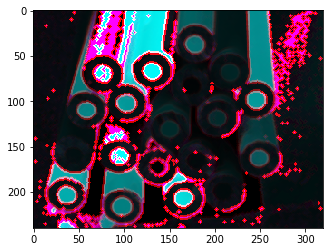

In [10]:
plt.imshow(result)